In [20]:
#Import 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
file = "Resources/ca_energy_gen.csv"
emis_file = "Resources/ca_emissions.csv"

#CA power generation
ca_df = pd.read_csv(file)
ca_df

#CA emissions
ca_em_df = pd.read_csv(emis_file)
ca_em_df

,Year,Transportation,Electric Power,Industrial,Commercial & Residential,Agriculture,High GWP,Recycling & Waste
0,2011,161.8,89.2,89.4,46.0,34.4,14.5,8.4
1,2012,161.4,98.2,88.9,43.5,35.5,15.5,8.3
2,2013,161.3,91.4,91.7,44.2,33.8,16.8,8.4
3,2014,162.6,88.9,92.5,38.2,34.7,17.7,8.4
4,2015,166.2,84.8,90.3,38.8,33.5,18.6,8.5
5,2016,169.8,68.6,89.0,40.6,33.3,19.2,8.6
6,2017,171.2,62.1,88.8,41.3,32.5,20.0,8.7
7,2018,169.6,63.1,89.2,41.4,32.7,20.4,8.7
8,2019,166.1,58.8,88.2,43.8,31.8,20.6,8.9


In [21]:
#Add total column to emissions
ca_em_df['Total'] = ca_em_df['Transportation'] + ca_em_df['Electric Power'] + ca_em_df['Industrial'] + ca_em_df['Commercial & Residential'] + ca_em_df['Agriculture'] + ca_em_df['High GWP'] + ca_em_df['Recycling & Waste']
ca_em_df

,Year,Transportation,Electric Power,Industrial,Commercial & Residential,Agriculture,High GWP,Recycling & Waste,Total
0,2011,161.8,89.2,89.4,46.0,34.4,14.5,8.4,443.7
1,2012,161.4,98.2,88.9,43.5,35.5,15.5,8.3,451.3
2,2013,161.3,91.4,91.7,44.2,33.8,16.8,8.4,447.6
3,2014,162.6,88.9,92.5,38.2,34.7,17.7,8.4,443.0
4,2015,166.2,84.8,90.3,38.8,33.5,18.6,8.5,440.7
5,2016,169.8,68.6,89.0,40.6,33.3,19.2,8.6,429.1
6,2017,171.2,62.1,88.8,41.3,32.5,20.0,8.7,424.6
7,2018,169.6,63.1,89.2,41.4,32.7,20.4,8.7,425.1
8,2019,166.1,58.8,88.2,43.8,31.8,20.6,8.9,418.2


In [7]:
#Calculate all totals for power generation
ca_df["CA Renew Total"] = ca_df["CA Large Hydro"] + ca_df["CA Small Hydro"] + ca_df["CA Geothermal"] + ca_df["CA Biomass"] + ca_df["CA Wind"] + ca_df["CA Solar PV"] + ca_df["CA Solar Thermal"] + ca_df["CA Waste Heat"]
ca_df["CA Non Renew Total"] = ca_df["CA Nuclear"] + ca_df["CA Coal"] + ca_df["CA Oil"] + ca_df["CA Natural Gas"] + ca_df["CA Petroleum Coke"]
ca_df["CA Total"] = ca_df["CA Renew Total"] + ca_df["CA Non Renew Total"]
ca_df

,Year,CA Large Hydro,CA Small Hydro,CA Nuclear,CA Coal,CA Oil,CA Natural Gas,CA Geothermal,CA Biomass,CA Wind,CA Solar PV,CA Solar Thermal,CA Petroleum Coke,CA Waste Heat,CA Renew Total,CA Non Renew Total,CA Total
0,2011,35682,7055,36666,2096,36,91063,12685,6060,7598,226,889,1024,267,70462,130885,201347
1,2012,22737,4724,18491,1262,48,121777,12733,6211,9242,1018,867,318,217,57749,141896,199645
2,2013,20319,3782,17860,824,38,120863,12510,6559,11964,3772,686,194,222,59814,139779,199593
3,2014,13739,2742,17027,802,45,121855,12186,6785,13104,9148,1624,208,237,59565,139937,199502
4,2015,11569,2427,18525,309,54,117565,11994,6367,12191,13057,2446,229,177,60228,136682,196910
5,2016,24410,4576,18931,324,37,98879,11582,5905,13499,17385,2548,207,182,80087,118378,198465
6,2017,36920,6384,17925,302,33,89588,11745,5847,12867,21895,2464,246,163,98285,108094,206379
7,2018,22096,4248,18268,294,35,90691,11528,5909,14244,24721,2545,207,223,85514,109495,195009
8,2019,33145,5349,16163,250,36,86134,10967,5936,13688,26323,2302,191,220,97930,102774,200704
9,2020,17938,3476,16280,317,30,92298,11345,5680,13708,27179,2277,197,187,81790,109122,190912


In [8]:
#Build percentage df
ca_perc_df = ca_df.loc[:, ["Year", "CA Renew Total", "CA Non Renew Total", "CA Total"]]
ca_perc_df["CA Renew Perc"] = round((ca_df["CA Renew Total"] / ca_df["CA Total"]) * 100, 2)
ca_perc_df["CA Non Renew Perc"] = round((ca_df["CA Non Renew Total"] / ca_df["CA Total"]) * 100, 2)

ca_perc_df

,Year,CA Renew Total,CA Non Renew Total,CA Total,CA Renew Perc,CA Non Renew Perc
0,2011,70462,130885,201347,35.00,65.00
1,2012,57749,141896,199645,28.93,71.07
2,2013,59814,139779,199593,29.97,70.03
3,2014,59565,139937,199502,29.86,70.14
4,2015,60228,136682,196910,30.59,69.41
5,2016,80087,118378,198465,40.35,59.65
6,2017,98285,108094,206379,47.62,52.38
7,2018,85514,109495,195009,43.85,56.15
8,2019,97930,102774,200704,48.79,51.21
9,2020,81790,109122,190912,42.84,57.16


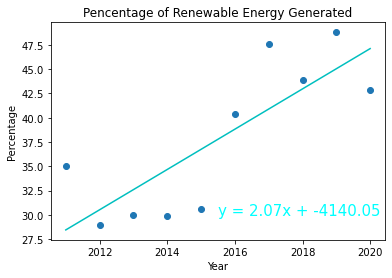

In [15]:
#scatter plot
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(ca_df["Year"], ca_perc_df["CA Renew Perc"])
regress_values = ca_df["Year"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(ca_df["Year"],regress_values,"c-")

year = ca_df["Year"]
renew = ca_perc_df["CA Renew Perc"]
non_renew = ca_perc_df["CA Non Renew Perc"]
plt.scatter(year,renew)
plt.xlabel("Year")
plt.title("Pencentage of Renewable Energy Generated")
plt.ylabel("Percentage")
plt.annotate(line_eq,(2015.5,30),fontsize=15,color="cyan")

plt.savefig("Images/ca_renew.png")
plt.show()

In [11]:
#Predictive Model
year = int(input('Enter a year: '))
print(f"The percentage of Renewable Energy in {year} will be {round(slope * year + intercept,2)}%.")


Enter a year: 2026
The percentage of Renewable Energy in 2026 will be 59.54%.


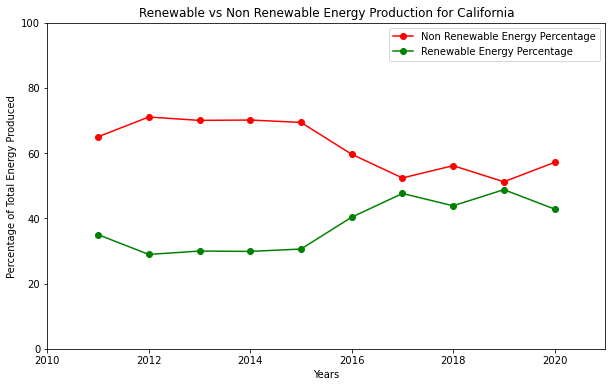

In [16]:
#Percentage of renewable power 
plt.figure(figsize=(10,6))
plt.plot(year, non_renew, color="red", marker ='o', label="Non Renewable Energy Percentage")
plt.plot(year, renew, color="green", marker ='o', label="Renewable Energy Percentage")
plt.title("Renewable vs Non Renewable Energy Production for California")
plt.xlabel("Years")
plt.ylabel("Percentage of Total Energy Produced")
plt.ylim(0,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_renew_vs_non.png")
plt.show()


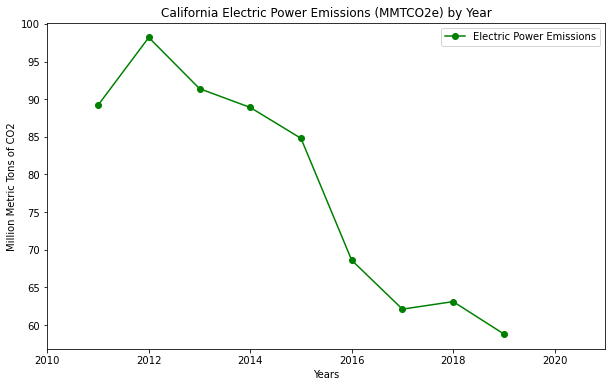

California's Elictric Power emissions have declinced 34.08%.


In [22]:
#CA emissions for electric power
em_year = ca_em_df["Year"]
em_elec = ca_em_df["Electric Power"]
em_total = ca_em_df["Total"]

plt.figure(figsize=(10,6))
plt.plot(em_year, em_elec, color="green", marker ='o', label="Electric Power Emissions")

plt.title("California Electric Power Emissions (MMTCO2e) by Year")
plt.xlabel("Years")
plt.ylabel("Million Metric Tons of CO2")
#plt.ylim(50,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_elec_emissions.png")
plt.show()
em_elec_change = (1 - (ca_em_df["Electric Power"][8] / ca_em_df["Electric Power"][0]))*100
print(f"California's Electric Power emissions have declinced {round(em_elec_change, 2)}%.")

In [23]:
#Predictive Model
(em_slope, em_intercept, em_rvalue, _, _) = linregress(ca_em_df["Year"], ca_em_df["Electric Power"])

em_year = int(input('Enter a year: '))
print(f"The CO2 emissions in {em_year} will be {round(em_slope * em_year + em_intercept,2)}(MMTCO2).")

Enter a year: 2026
The CO2 emissions in 2026 will be 22.28(MMTCO2).


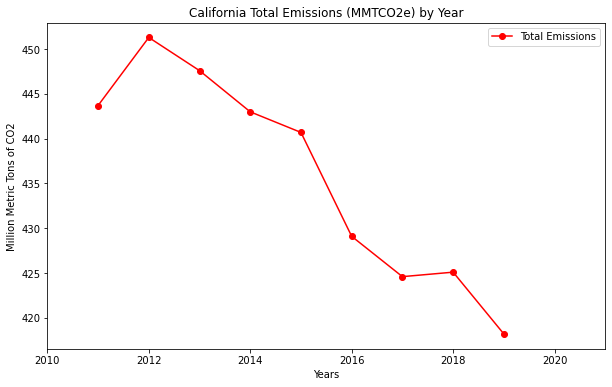

California's total emissions have declinced 5.75%


In [17]:
#CA total emissions
plt.figure(figsize=(10,6))
plt.plot(em_year, em_total, color="red", marker ='o', label="Total Emissions")
plt.title("California Total Emissions (MMTCO2e) by Year")
plt.xlabel("Years")
plt.ylabel("Million Metric Tons of CO2")
#plt.ylim(50,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_total_emissions.png")
plt.show()

em_tot_change = (1 - (ca_em_df["Total"][8] / ca_em_df["Total"][0]))*100
print(f"California's total emissions have declinced {round(em_tot_change, 2)}%") 